In [ ]:
'''
Assignment 3: Titanic Survival Prediction
Dataset: Titanic
Link: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Task:
 Predict survival based on passenger features.
 Impute missing Age, Cabin, Embarked.
 Label encode Sex, Embarked.
 Standardize numeric features like Age, Fare.
 Train logistic regression & generate probability predictions.


'''

In [292]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
import pandas as pd
df = pd.read_csv(' https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')  ## load the dataset

In [294]:
df  ## show the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [295]:
df.isnull().sum()  ## check null value present or not

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [296]:
df1 = df.drop(['Name','PassengerId','Ticket'],axis=1)  ## this columns do not relation with this project. So drop this column

In [297]:
## Print unique value of all column 
for i in range(df1.shape[1]):
    print(f'Unique value of {df1.columns[i]} is : ',df1[df1.columns[i]].unique(),'\n\n')  

Unique value of Survived is :  [0 1] 


Unique value of Pclass is :  [3 1 2] 


Unique value of Sex is :  ['male' 'female'] 


Unique value of Age is :  [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ] 


Unique value of SibSp is :  [1 0 3 4 2 5 8] 


Unique value of Parch is :  [0 1 2 5 3 4 6] 


Unique value of Fare is :  [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.

In [298]:
df1['Deck'] = df1['Cabin'].str[0]  ## in cabin column , fetch only 1st alphabetical word not use last numerical value

In [299]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,NaN,S,NaN
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,NaN
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,NaN
887,1,1,female,19.0,0,0,30.0000,B42,S,B
888,0,3,female,NaN,1,2,23.4500,NaN,S,NaN
889,1,1,male,26.0,0,0,30.0000,C148,C,C


In [300]:
df1['Cabin'].str[0].value_counts()  ## value count of unique value of cabin column

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [301]:
df1['Deck'] = df1['Deck'].fillna(df1['Pclass'].map({1:'C',2:'D',3:'F'}))  ## null value fill with help of pclass column

In [302]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,NaN,S,F
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,F
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,F
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,D
887,1,1,female,19.0,0,0,30.0000,B42,S,B
888,0,3,female,NaN,1,2,23.4500,NaN,S,F
889,1,1,male,26.0,0,0,30.0000,C148,C,C


<Axes: >

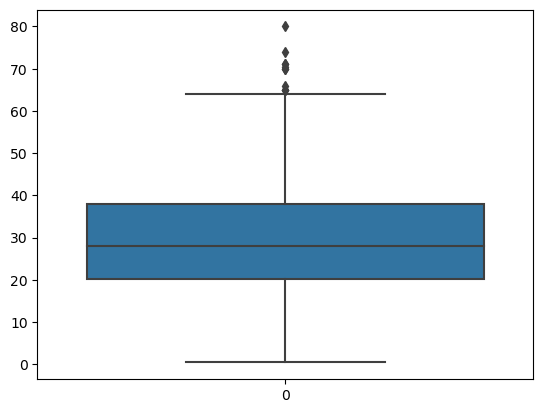

In [303]:
sns.boxplot(df1['Age'])  ## show boxplot of this column for seeing data location of this column

In [304]:
df1['Age'] = df1['Age'].fillna(df1['Age'].median())  ## fill null value with help of median value of this column

In [305]:
df1.isnull().sum()  ## after fill null value again check null value present or not

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Deck          0
dtype: int64

In [306]:
df2 = df1.drop(['Cabin'],axis=1)  ## drop cabin column

In [307]:
df2  ## last stage dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,F
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,F
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,F
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,D
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,28.0,1,2,23.4500,S,F
889,1,1,male,26.0,0,0,30.0000,C,C


In [308]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler

In [309]:
le = LabelEncoder()  ## create object of label encoder

In [310]:
df2[['Sex','Embarked']] = df2[['Sex','Embarked']].apply(le.fit_transform)  ## apply labelencoder of this column

In [311]:
df2['Deck'].unique()  ## unique value of deck column

array(['F', 'C', 'E', 'D', 'G', 'A', 'B', 'T'], dtype=object)

In [312]:
oe =OrdinalEncoder(categories=[['A','B','C','D','E','F','G','T']])  ## create object of ordinal encoder of deck column

In [313]:
s = df2['Deck'].values

In [314]:
oe.fit(s.reshape(-1,1))  ## fit on ordinal encoder

,categories,"[['A', 'B', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [315]:
df2['Deck'] = oe.transform(df2[['Deck']])  ## transform on ordinal encoder

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(


In [316]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22.0,1,0,7.2500,2,5.0
1,1,1,0,38.0,1,0,71.2833,0,2.0
2,1,3,0,26.0,0,0,7.9250,2,5.0
3,1,1,0,35.0,1,0,53.1000,2,2.0
4,0,3,1,35.0,0,0,8.0500,2,5.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,3.0
887,1,1,0,19.0,0,0,30.0000,2,1.0
888,0,3,0,28.0,1,2,23.4500,2,5.0
889,1,1,1,26.0,0,0,30.0000,0,2.0


In [317]:
x = df2.drop(['Survived'],axis=1)

In [318]:
y = df2['Survived']

In [319]:
from sklearn.model_selection import train_test_split

In [320]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [321]:
scaler = StandardScaler()  ## create object of standard scaler

In [322]:
col = ['Age','Fare']

In [323]:
x_train[col] = scaler.fit_transform(x_train[col])  ## fit and transform of scalling on x_train of this two numeical continuous value
x_test[col] = scaler.transform(x_test[col])  ## only transform of scalling on x_test of this two numerical column

In [324]:
x_train.head() ## after scalling we show the dataset

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
367,3,0,-0.134521,0,0,-0.484442,0,5.0
183,2,1,-2.195645,2,1,0.126878,2,5.0
845,3,1,0.934210,0,0,-0.478270,2,5.0
351,1,1,-0.134521,0,0,0.049912,2,2.0
20,2,1,0.399845,0,0,-0.123262,2,3.0


In [325]:
from sklearn.linear_model import LogisticRegression

In [326]:
lr = LogisticRegression()  ## create object of logistic regression

In [327]:
lr.fit(x_train , y_train)  ## fitting of logistic regression 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [328]:
y_pred = lr.predict(x_test)  ## predict of logistic regression of x_test dataset

In [329]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [330]:
accuracy_score(y_test,y_pred)  ## check accuracy score

0.8212290502793296

[[93 17]
 [15 54]]


Text(50.722222222222214, 0.5, 'Actual Values')

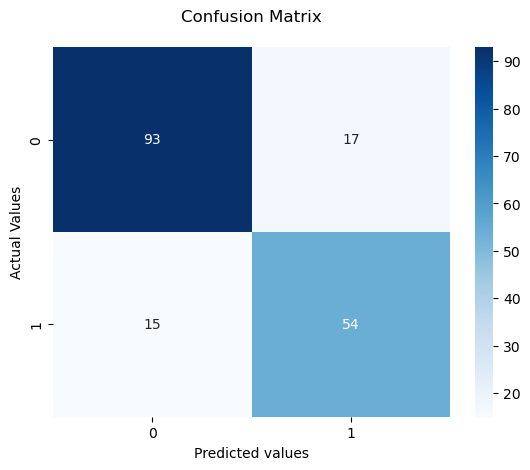

In [331]:
## print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
plt.title('Confusion Matrix\n')
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')

In [332]:
print(classification_report(y_test,y_pred))  ## print classification report

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.76      0.78      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [333]:
df4 = pd.DataFrame(y_pred,columns=['Survived_prediction'])  ## create dataframe of predict of the model

In [334]:
df4

,Survived_prediction
0,1
1,0
2,0
3,0
4,0
...,...
174,1
175,1
176,1
177,0


In [335]:
df5 = pd.concat([x,y,df4],axis=1)  ## add x,y,and predicted dataframe

In [336]:
df5

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Survived,Survived_prediction
0,3,1,22.0,1,0,7.2500,2,5.0,0,1.0
1,1,0,38.0,1,0,71.2833,0,2.0,1,0.0
2,3,0,26.0,0,0,7.9250,2,5.0,1,0.0
3,1,0,35.0,1,0,53.1000,2,2.0,1,0.0
4,3,1,35.0,0,0,8.0500,2,5.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,3.0,0,NaN
887,1,0,19.0,0,0,30.0000,2,1.0,1,NaN
888,3,0,28.0,1,2,23.4500,2,5.0,0,NaN
889,1,1,26.0,0,0,30.0000,0,2.0,1,NaN


In [337]:
cols = ['Age','Fare']

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_25156\47780512.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5[df5['Survived']==0][cols[i]],hist=False,ax=ax1)
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_25156\47780512.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code 

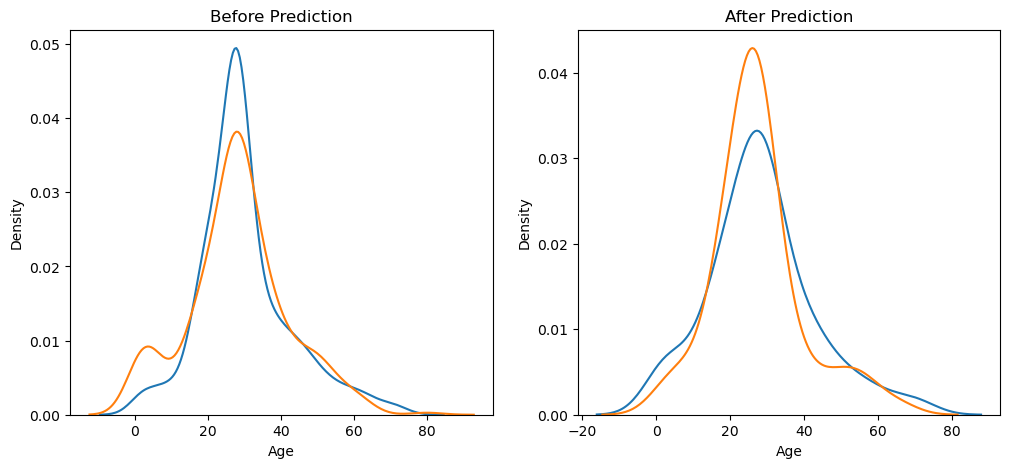

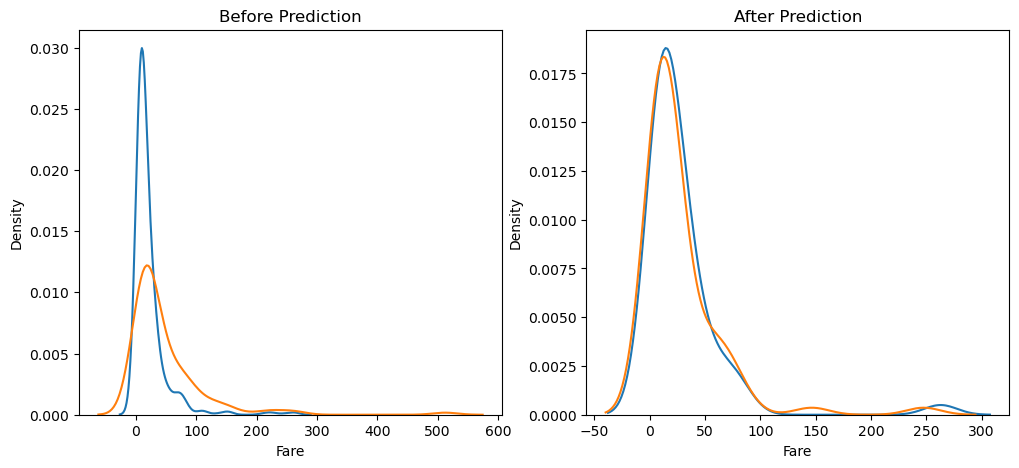

In [338]:
## show after prediction and before prediction of survived depend on age and fare 
for i in range(len(cols)):
    fig ,(ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
    ax1.set_title('Before Prediction')
    sns.distplot(df5[df5['Survived']==0][cols[i]],hist=False,ax=ax1)
    sns.distplot(df5[df5['Survived']==1][cols[i]],hist=False,ax=ax1)
    
    ax2.set_title('After Prediction')
    sns.distplot(df5[df5['Survived_prediction']==0][cols[i]],hist=False,ax=ax2)
    sns.distplot(df5[df5['Survived_prediction']==1][cols[i]],hist=False,ax=ax2)
    

In [ ]:
'''

Model Interpretation :
                In this study, a machine learning model was developed to predict passenger survival in the Titanic dataset. 
                Appropriate data preprocessing techniques were applied, including handling missing values using suitable statistical methods,
                applying Label Encoding for categorical variables, and using Ordinal Encoding where an inherent order was present.
                After training the model, an accuracy of 82% was achieved.
                
                An accuracy of 82% indicates that the model correctly classifies survival outcomes for approximately 82 out of every 100 passengers.
                This demonstrates that the model has effectively captured important relationships between the input features and the target variable.
                Features such as passenger class (Pclass), gender (Sex), age (Age), and fare (Fare) play a significant role in predicting survival. 
                Given the relatively small size and real-world noise present in the Titanic dataset, this accuracy level represents a satisfactory baseline performance.
                
                
Conclusion :
        1. The Titanic survival prediction model achieved an accuracy of 82%, indicating satisfactory predictive performance for a real-world dataset.
        2. The use of Label Encoding and Ordinal Encoding enabled categorical variables to be effectively utilized by the machine learning algorithm.
        3. Important survival-related factors such as passenger class, gender, age, and fare were successfully identified by the model.
        4. The model provides a strong baseline solution that is simple, interpretable, and computationally efficient.
        5. Model performance can be further enhanced through feature engineering, advanced ensemble algorithms, and hyperparameter tuning.
        6. Overall, the study demonstrates that effective preprocessing plays a crucial role in machine learning performance, 
            and the proposed improvements have the potential to significantly increase the predictive accuracy and reliability of the model.
'''